In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from math import cos, sin, pi
%matplotlib inline  

In [2]:
def distance(p1,p2):
    dx = p1[0]-p2[0]
    dy = p1[1]-p2[1]
    distance = np.sqrt(dx*dx+dy*dy)
    return distance

def circle_intersection(circle1, circle2):
    '''
    Find 2 intersection points from 2 circles.
    if circles are non overlap, return middle point between 2 perimeters
    '''  
    x1,y1,r1 = circle1
    x2,y2,r2 = circle2
    dx,dy = x2-x1,y2-y1
    d = np.sqrt(dx*dx+dy*dy)
    #d = distance([x1,y1],[x2,y2])
    
    # non-overlapping circles
    if d >= r1+r2:
        return (( (d+r1-r2)/(2*d)*(x2-x1)+x1, (d+r1-r2)/(2*d)*(y2-y1)+y1 ),) 

    # one circle inside another
    elif r1 > (d+r2) or r2 > (d+r1):
        if dx == 0: angle = pi/2
        else: angle = np.arctan(dy/dx)
        p11 = [ x1+r1*cos(angle), y1+r1*sin(angle) ]
        p12 = [ x1-r1*cos(angle), y1-r1*sin(angle) ]
        p21 = [ x2+r2*cos(angle), y2+r2*sin(angle) ]
        p22 = [ x2-r2*cos(angle), y2-r2*sin(angle) ]
        
        point_set = [[p11,p21],[p11,p22],[p12,p21],[p12,p22]]
        
        dist_set = [distance(item[0],item[1]) for item in point_set]
        points = point_set[np.argmin(dist_set)]
        points = np.array(points)
        points = sum(points)/len(points)

        return (points,)
    
    # overlapping circles
    else:
        a = (r1*r1-r2*r2+d*d)/(2*d)
        h = np.sqrt(r1*r1-a*a)
        xm = x1 + a*dx/d
        ym = y1 + a*dy/d
        xs1 = xm + h*dy/d
        xs2 = xm - h*dy/d
        ys1 = ym - h*dx/d
        ys2 = ym + h*dx/d

        return (xs1,ys1),(xs2,ys2)

def plot(cs):
   
    cmap = cm.plasma
    
    fig, ax = plt.subplots() 
    ax.set(xlim=[-10, 10], ylim=[-10, 10], aspect=1)
    
    for i,c in enumerate(cs):
        ax.add_artist(plt.Circle(c[:2], c[2], color=cmap(i/len(cs)), alpha=0.5))
        ax.plot(c[0], c[1], 'or')

    return fig, ax

def choose_point(points, circle, order):
    '''
    1. choose point nearest to perimeter of given circle
    2. between choosen point and perimeter of circle, calculate location from weight average 
    
    Args:
        points: [[x1,y1],[x2,x2],...]
        circle: [center_x, center_y, radius]
        order = number of circle in this calculation
    Returns:
        result: [x,y]
    ''' 
    distance = ()
    for point in points:
        dx = point[0]-circle[0]
        dy = point[1]-circle[1]
        dist = np.sqrt(dx*dx+dy*dy) - circle[2] 
        distance = distance + (dist,)
    
    arg = np.argmin([abs(i) for i in distance])
    choosen_point = points[arg]
    # ref_point = point on c3 perimeter closest to choosen_point
    ref_point = [circle[0]+(choosen_point[0]-circle[0])*circle[2]/(circle[2]+distance[arg]), 
                 circle[1]+(choosen_point[1]-circle[1])*circle[2]/(circle[2]+distance[arg])]
    result = [((order-1)*choosen_point[0]+ref_point[0])/order, ((order-1)*choosen_point[1]+ref_point[1])/order]
        
    return result

In [3]:
def trilateration(c1, c2, c3):
    
    points = circle_intersection(c1, c2)
    result = choose_point(points, c3, 3)
    
    fig, ax = plot([c1, c2, c3])
    ax.plot(result[0], result[1], "*")
    return result

[1.9250329543556581, 6.3898989061394857]

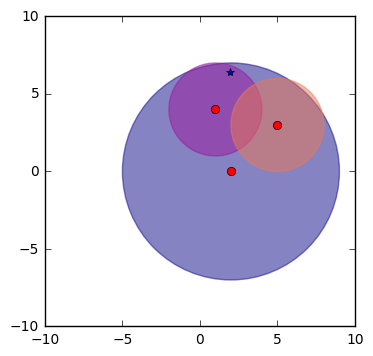

In [4]:
c1 = (2, 0, 7)
c2 = (1, 4, 3)
c3 = (5, 3, 3)
c4 = (2, 2, 4)

trilateration(c1, c2, c3)

In [5]:
def trilateration2(c1, c2, c3):
    circles = [c1,c2,c3]
    results = []
    for i in range(3):
        first = circles[0]
        circles.pop(0)
        circles.append(first)
    
        points = circle_intersection(circles[0], circles[1])
        result = choose_point(points, circles[2], 3)
        results.append(result)
     
    results = np.array(results)
    location = sum(results)/len(results)
    
    fig, ax = plot([c1, c2, c3])
    ax.plot(location[0],location[1], "*")
    return location

array([ 3.55445729,  6.00720109])

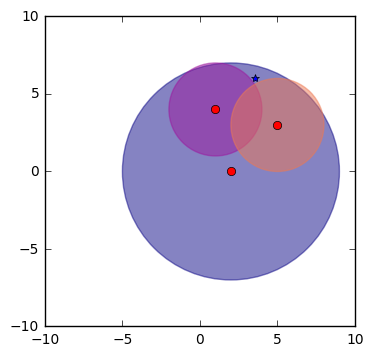

In [6]:
c1 = (2, 0, 7)
c2 = (1, 4, 3)
c3 = (5, 3, 3)

trilateration2(c1, c2, c3)

In [7]:
def trilateration3(cs):
    results = []
    for i in range(len(cs)):
        if i!=0:
            first = cs[0]
            cs.pop(0)
            cs.append(first)
        points = circle_intersection(cs[0], cs[1])       
        for j, circle in enumerate(cs[2:]):
            points = choose_point(points, circle, order = j+3)
            points = np.expand_dims(points, axis=0)
        results.append(points[0])
     
    results = np.array(results)
    location = sum(results)/len(results)
    
    print('error: ')
    for result in results:
        err = distance(result, location)
        print(err)
   
    fig, ax = plot(cs)
    ax.plot(location[0], location[1], "*")
    
    return location

error: 
0.189448791404
0.339599615211
0.385456922628
0.911767133396


array([ 3.22350998,  5.77315699])

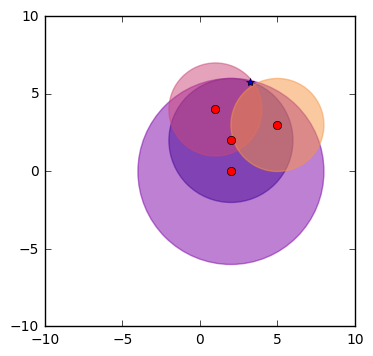

In [11]:
c1 = (2, 0, 6)
c2 = (1, 4, 3)
c3 = (5, 3, 3)
c4 = (2, 2, 4)

trilateration3([c1, c2, c3, c4])

error: 
0.285679045411
0.266096426884
0.262053889194
0.192090961574


array([ 0.44796396,  0.10090156])

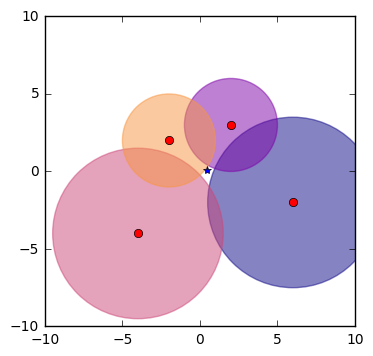

In [20]:
c1 = (2, 3, 3)
c2 = (-4, -4, 5.5)
c3 = (-2, 2, 3)
c4 = (6, -2, 5.5)

trilateration3([c1, c2, c3, c4])